In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import cv2
import csv
from numpy import genfromtxt
import mpmath
import sys
np.set_printoptions(threshold=sys.maxsize)

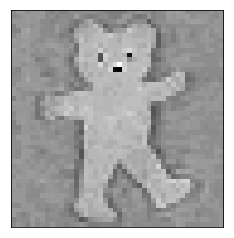

In [2]:
# Read the test image 

img = cv2.imread('PA2-testimages/template_bear.png',0)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

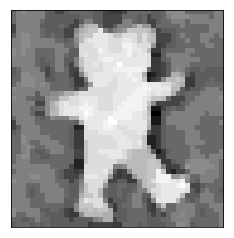

In [3]:
# Do median filter for the test image 

median_img = cv2.medianBlur(img , 3)
plt.imshow(median_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

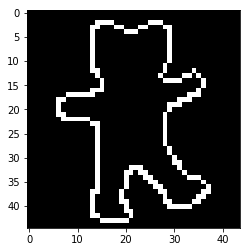

In [4]:
# Canny edge operation, edge detection and edge thinning 
# For template bear, TL = 30 and TH = 50

CannyEdge_img = cv2.Canny(median_img , 30 , 50)
CannyEdge_img = genfromtxt('im_canny_temp_bear2.csv', delimiter=',')
plt.imshow(CannyEdge_img, cmap = 'gray')
plt.show()

In [5]:
# Find the reference point of the template image
# We use the center of the image

refer_pointx = CannyEdge_img.shape[1] / 2
refer_pointy = CannyEdge_img.shape[0] / 2

print(refer_pointx , refer_pointy)

22.0 22.5


In [6]:
# check = genfromtxt('check.csv', delimiter=',')
# r = genfromtxt('r.csv', delimiter=',')
# alpha = genfromtxt('alpha.csv', delimiter=',')

In [7]:
# calculate distance between reference point 
def R_dist(xc, yc, x, y):
    return np.sqrt( (xc - x) ** 2 + (yc - y) ** 2 )

# calculate alpha between reference point
def R_alpha(xc, yc, x, y):
    alpha = 0;
    x_check = x - xc;
    y_check = y - yc;
    
    if (x_check >= 0) and (y_check < 0):
        alpha = np.arctan2(abs(y_check), abs(x_check)) * 180 / np.pi
    elif (x_check < 0) and (y_check < 0):
        alpha = 180 - np.arctan2(abs(y_check), abs(x_check)) * 180 / np.pi
    elif (x_check < 0) and (y_check >= 0):
        alpha = 180 + np.arctan2(abs(y_check), abs(x_check)) * 180 / np.pi
    else: # (x_check > 0) and (y_check > 0):
        alpha = 360 - np.arctan2(abs(y_check), abs(x_check) ) * 180 / np.pi
        
    return alpha
#     return np.floor(alpha) if alpha >= 0 else np.floor(alpha + 360)

def gradient_information(img):
    # Get gradient information
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
    angle = np.arctan2(sobely, sobelx) * 180 / np.pi
    
    # Convert negative angle to positive angle 
    for i in range(angle.shape[0]):
        for j in range(angle.shape[1]):
            angle[i][j] = angle[i][j] if angle[i][j] >= 0 else angle[i][j] + 360
    # angle[angle < 0] += 360
    
    return magnitude, angle

In [8]:
# Build R table 

# Get the gradient information 
magnitude, angle = gradient_information(CannyEdge_img)
angle = genfromtxt('Gdir_temp_bear2.csv', delimiter=',')

# find edge point
edge_map = []
for i in range(CannyEdge_img.shape[0]):
    for j in range(CannyEdge_img.shape[1]):
        if (CannyEdge_img[i][j] != 0):
            edge_map.append((i,j))

R_table = {}

for i in range(3600):
    temp_list = []
    for j in range(len(edge_map)):
        R_table.setdefault(i , [])
        
for i in range(len(edge_map)):
    x = edge_map[i][1]
    y = edge_map[i][0]
    
    gradient_direct = np.round(angle[y][x] , decimals = 1) * 10
    r = R_dist(refer_pointx , refer_pointy, x , y)
    alpha = R_alpha(refer_pointx , refer_pointy, x , y)
    R_table[gradient_direct].append((r,alpha))
    
# for i in range(360):
#     for j in range(144):
#         if (check[i][j] == 1):
#             R_table[i].append( (r[i][j] , alpha[i][j]) )
R_table

{0: [(21.360009363293827, 106.31385242626055),
  (20.886598574205422, 78.95905981967627),
  (20.402205763103165, 72.89727103094764),
  (18.527007313648905, 93.0940580589171),
  (19.67866865415443, 117.21611155730747),
  (18.848076824970764, 68.19859051364818),
  (18.7949461292125, 118.61045966596521),
  (17.92344832893492, 67.01128319791937),
  (17.92344832893492, 120.14138555207533),
  (17.00735135169495, 65.69545073406329),
  (17.066048165876012, 121.82744657667311),
  (16.101242188104617, 64.23067237566129),
  (16.224980739587952, 123.69006752597979),
  (15.20690632574555, 62.59242456218159),
  (15.402921800749363, 125.75388725443673),
  (10.735455276791944, 62.24145939893998),
  (16.101242188104617, 36.15818543980833),
  (11.01135777277262, 50.527540151656176),
  (11.672617529928752, 46.73570458892839),
  (10.307764064044152, 140.9061411137705),
  (14.115594213493104, 157.06789956241022),
  (13.200378782444085, 155.37643521383637),
  (12.298373876248844, 153.43494882292202),
  (13.

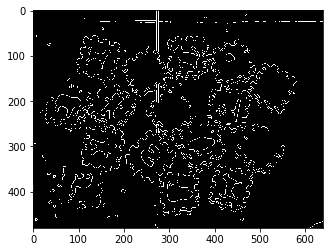

In [9]:
# Canny edge operation, edge detection and edge thinning 
# For Test image, TL = 30 and TH = 50

test_img = cv2.imread('PA2-testimages/animals2.jpg', 0)
test_median_img = cv2.medianBlur(test_img , 9)

test_canny = cv2.Canny(test_median_img , 10 , 20)
test_canny = genfromtxt('im_canny_test_bear2.csv', delimiter=',')
test_magnitude , test_angle = gradient_information(test_canny)
test_angle = genfromtxt('Gdir_test_bear2.csv', delimiter=',')

plt.imshow(test_canny, cmap = 'gray')
plt.show()

vote_max: 14
vote_map: (array([301]), array([154]))
vote_map_index: [301, 154]


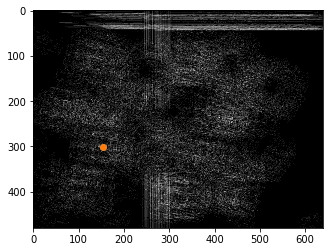

In [14]:
# Initialized a accumulator array

test_img = np.array(test_img)
h = test_img.shape[0]
w = test_img.shape[1] 

accumulator = []
for i in range(h):                
    new = []                 
    for j in range(w):   
        new.append(0)      
    accumulator.append(new) 

# vote

# find edge point of test image
test_canny = np.array(test_canny)

test_edge_map = []
for i in range(h):
    for j in range(w):
        if (test_canny[i][j] != 0):
            test_edge_map.append((i,j))

for i in range(len(test_edge_map)):
    x = test_edge_map[i][1]
    y = test_edge_map[i][0]
    fi = np.round(test_angle[ y ][ x ] , decimals = 1) * 10
    rotate_fi = np.int(fi)
    
    if len(R_table[rotate_fi]) != 0:
        tuple_list = R_table[rotate_fi]
        for j in range(len(tuple_list)):
            r , alpha = tuple_list[j]
            scale_r = r * 1.4
            rotate_alpha = (( alpha - 105 ) + 360) % 360
#             rotate_alpha = alpha
    
            xc = np.int(x - scale_r * np.cos(np.deg2rad(rotate_alpha)) ) 
            yc = np.int(y + scale_r * np.sin(np.deg2rad(rotate_alpha)) )

            if xc > 0 and xc < w and yc > 0 and yc < h:
                accumulator[yc][xc] = accumulator[yc][xc] + 1

implot = plt.imshow(accumulator, cmap = 'gray')

accumulator = np.array(accumulator)


index = [0,0]
vote_max = 0
for i in range(h):
    for j in range(w):
        if(accumulator[i][j] >= vote_max):
            vote_max = accumulator[i][j]
            index[0] = i
            index[1] = j
thres_max = vote_max * 0.99
vote_map = np.where( accumulator > thres_max )
print("vote_max:" , vote_max)
print("vote_map:" , vote_map)

print("vote_map_index:" , index)

plt.scatter(index[1], index[0])
for i in range(len(vote_map[0])):
    plt.scatter(vote_map[1][i], vote_map[0][i])

plt.show()

pd.DataFrame(accumulator).to_csv("accumulator_csv/find_bear_105.csv")

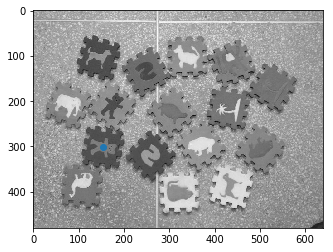

In [11]:
implot = plt.imshow(test_img, cmap = 'gray')

for i in range(len(vote_map[0])):
    plt.scatter(vote_map[1][i], vote_map[0][i])

plt.show()

In [12]:
# for letters middle k test_img median 9 canny 30 50 , rotate +5  [360, 364]
#                      template 3 canny 30 50 
# for letters right most q canny 10 30 , rotate +8
# for letters middle q canny 10 30 , no rotate
# for letters bottlom q canny 10 30 , rotate +11

# for elephant in animals.png rotate 90 and scale 1 use matlab canny
# for elephant in animals2.png rotate -16 and scale 1.4 use python canny 
# for bear in animals.png rotate -30 and scale 1 use matlab canny 